/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

ROC-AUC score:  0.6190476190476191
PR-AUC score:  0.5722425722425721
Accuracy: 0.6190476190476191


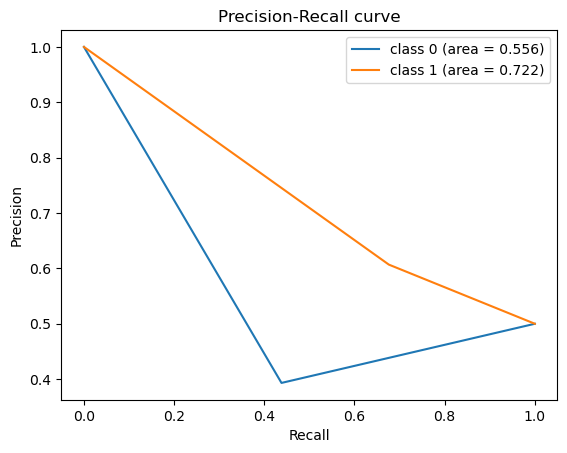

In [48]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, roc_curve
from sklearn.metrics import average_precision_score, auc
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv')

# drop unwanted columns
df = df.drop(df.columns[[0, 1,]], axis=1)

# define features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# fit the SVM model
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

# predict on test set
y_pred = clf.predict(X_test)

# calculate roc-auc score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score: ", roc_auc)

# calculate pr-auc score
pr_auc = average_precision_score(y_test, y_pred)
print("PR-AUC score: ", pr_auc)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


# calculate precision-recall curve for class 0
precisions0, recalls0, thresholds0 = precision_recall_curve(y_test, y_pred, pos_label=0)

# calculate precision-recall curve for class 1
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_pred, pos_label=1)

# calculate area under the curve for each class
area0 = auc(recalls0, precisions0)
area1 = auc(recalls1, precisions1)

# plot the precision-recall curves
plt.plot(recalls0, precisions0, label='class 0 (area = {:0.3f})'.format(area0))
plt.plot(recalls1, precisions1, label='class 1 (area = {:0.3f})'.format(area1))

# add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='bottom')
plt.savefig("precision_recall_curve.png")
plt.show()


# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")
plt.show()


In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, roc_curve
from sklearn.metrics import average_precision_score, auc
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv')

# drop unwanted columns
df = df.drop(df.columns[[0,1,3,4,5,6,7,8]], axis=1)

# define features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Create the xGBoost data matrices
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test)

# Define the xGBoost parameters
params = {"objective":"binary:logistic", "max_depth":3}

# Train the model
xg_clf = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=10)

# Make predictions on the test set
y_pred = xg_clf.predict(test_dmatrix)


# calculate roc-auc score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score: ", roc_auc)

# calculate pr-auc score
pr_auc = average_precision_score(y_test, y_pred)
print("PR-AUC score: ", pr_auc)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


# calculate precision-recall curve for class 0
precisions0, recalls0, thresholds0 = precision_recall_curve(y_test, y_pred, pos_label=0)

# calculate precision-recall curve for class 1
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_pred, pos_label=1)

# calculate area under the curve for each class
area0 = auc(recalls0, precisions0)
area1 = auc(recalls1, precisions1)

# plot the precision-recall curves
plt.plot(recalls0, precisions0, label='class 0 (area = {:0.3f})'.format(area0))
plt.plot(recalls1, precisions1, label='class 1 (area = {:0.3f})'.format(area1))

# add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='bottom')
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/XGB/a-pr.png")
plt.show()


# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/XGB/a-roc.png")
plt.show()


[12:46:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC-AUC score:  0.6855328798185942
PR-AUC score:  0.6378195329465375


ValueError: Classification metrics can't handle a mix of binary and continuous targets

/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


[14:00:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 65.24%


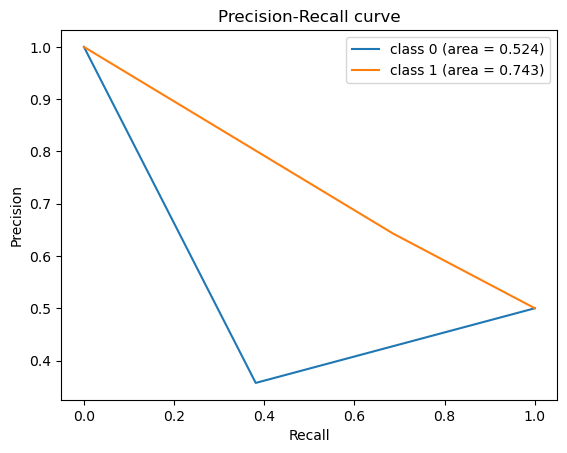

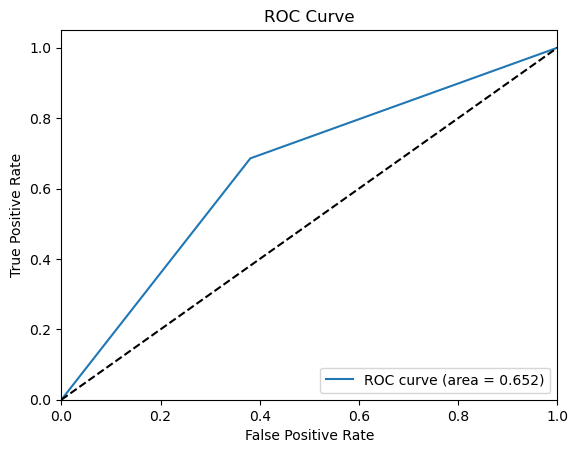

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb

# load your dataset and convert it to a pandas dataframe
data = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv')

# separate the labels and variables
y = data[data.columns[-1]]
X = data.drop(columns=(data.columns[[0,1,7,8,9]]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# train the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# calculate precision-recall curve for class 0
precisions0, recalls0, thresholds0 = precision_recall_curve(y_test, y_pred, pos_label=0)

# calculate precision-recall curve for class 1
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_pred, pos_label=1)

# calculate area under the curve for each class
area0 = auc(recalls0, precisions0)
area1 = auc(recalls1, precisions1)

# plot the precision-recall curves
plt.plot(recalls0, precisions0, label='class 0 (area = {:0.3f})'.format(area0))
plt.plot(recalls1, precisions1, label='class 1 (area = {:0.3f})'.format(area1))

# add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='bottom')
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/XGB/i-pr.png")
plt.show()


# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/XGB/i-roc.png")
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 836, number of used features: 5
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


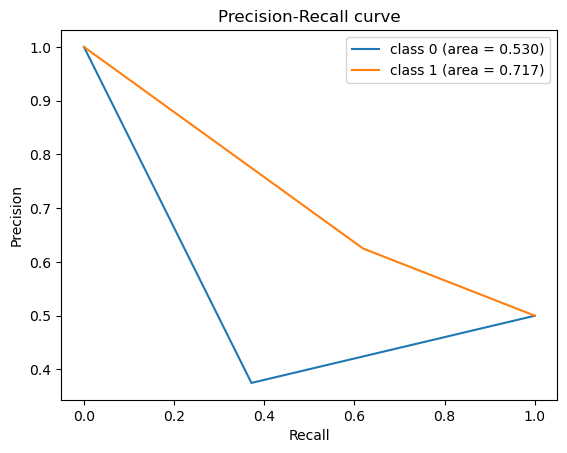

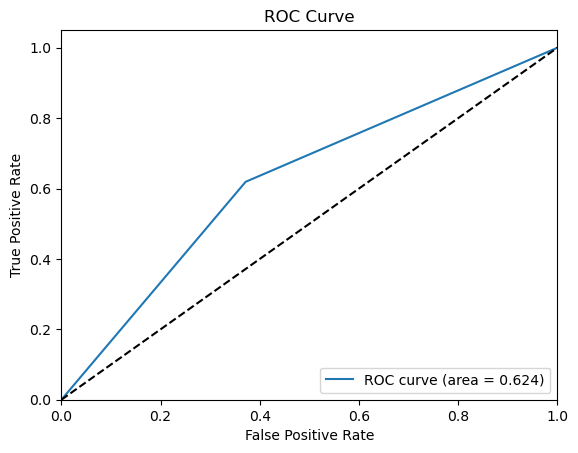

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# load your dataset and convert it to a pandas dataframe
data = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv')

# separate the labels and variables
y = data[data.columns[-1]]
X = data.drop(columns=(data.columns[[0,1,7,8,9]]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Create LightGBM dataset
train_dataset = lgb.Dataset(X_train, label=y_train)

# Train model
params = {} # use default parameters
model = lgb.train(params, train_dataset)

# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# calculate precision-recall curve for class 0
precisions0, recalls0, thresholds0 = precision_recall_curve(y_test, y_pred, pos_label=0)

# calculate precision-recall curve for class 1
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_pred, pos_label=1)

# calculate area under the curve for each class
area0 = auc(recalls0, precisions0)
area1 = auc(recalls1, precisions1)

# plot the precision-recall curves
plt.plot(recalls0, precisions0, label='class 0 (area = {:0.3f})'.format(area0))
plt.plot(recalls1, precisions1, label='class 1 (area = {:0.3f})'.format(area1))

# add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='bottom')
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/LGB/i-pr.png")
plt.show()


# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/LGB/i-roc.png")
plt.show()

In [37]:
import numpy as np
print(np.__version__)
print(pd.__version__)

1.21.5
0.23.4


/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Accuracy: 0.6523809523809524


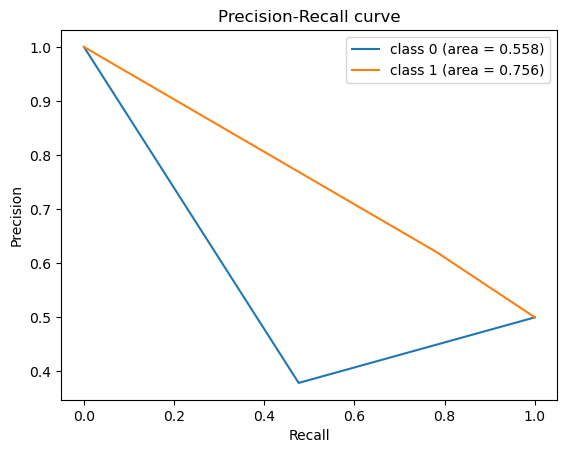

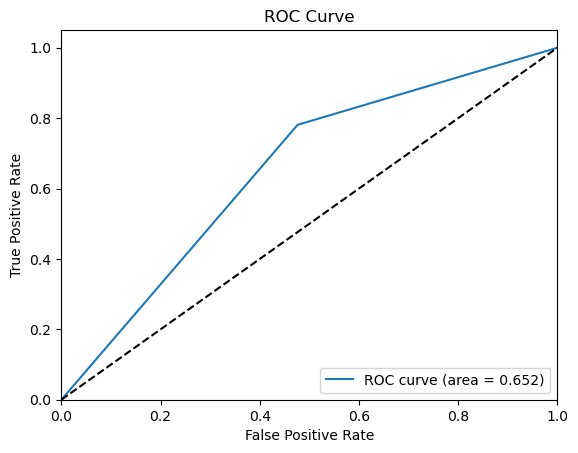

In [33]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# load your dataset and convert it to a pandas dataframe
data = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv')

# separate the labels and variables
y = data[data.columns[-1]]
X = data.drop(columns=(data.columns[[0,1,7,8,9]]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the MLPClassifier with default parameters
clf = MLPClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get predictions on the test set
y_pred = clf.predict(X_test)

# Get accuracy score
acc = clf.score(X_test, y_test)
print("Accuracy:", acc)

# calculate precision-recall curve for class 0
precisions0, recalls0, thresholds0 = precision_recall_curve(y_test, y_pred, pos_label=0)

# calculate precision-recall curve for class 1
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_pred, pos_label=1)

# calculate area under the curve for each class
area0 = auc(recalls0, precisions0)
area1 = auc(recalls1, precisions1)

# plot the precision-recall curves
plt.plot(recalls0, precisions0, label='class 0 (area = {:0.3f})'.format(area0))
plt.plot(recalls1, precisions1, label='class 1 (area = {:0.3f})'.format(area1))

# add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='bottom')
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/MLP/i-pr.png")
plt.show()


# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/MLP/i-roc.png")
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# load your dataset and convert it to a pandas dataframe
data = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv')

# separate the labels and variables
y = data[data.columns[-1]]
X = data.drop(columns=(data.columns[[0,1,5,7,8,9]]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 250, 500],
    'max_depth': [5, 10, 25],
    'num_leaves': [10, 30, 50],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.1, 0.5, 1.0],
    'min_child_weight': [1, 3, 5],
    'clf_random_state': [1, 5, 10]    
}

# Create the LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(lgb_clf, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
[LightGBM] [Warning] Unknown parameter: clf_random_state
Best parameters: {'clf_random_state': 1, 'colsample_bytree': 1.0, 'learning_rate': 0.001, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'num_leaves': 10, 'subsample': 0.5}
Best score: 0.6758197889934416


In [337]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your data into a DataFrame
df = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/mx_last2.csv')

# Select the 9th column of the DataFrame
X = df.iloc[:,8:9]

# Create an instance of the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the feature matrix
scaler.fit(X)

# Transform the feature matrix
X_scaled = scaler.transform(X)

# Assign the transformed column to the 9th column of the original dataframe
df.iloc[:,8:9] = X_scaled
df = df.round(3)

# Export the dataframe to a CSV file
df.to_csv('/Users/mertcakir/Desktop/tez python/texts/mx_last3.csv', index=False)

/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: clf_random_state
[LightGBM] [Warning] Unknown parameter: clf_random_state
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 169, number of used features: 4
[LightGBM] [Info] Start training from score 0.502959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


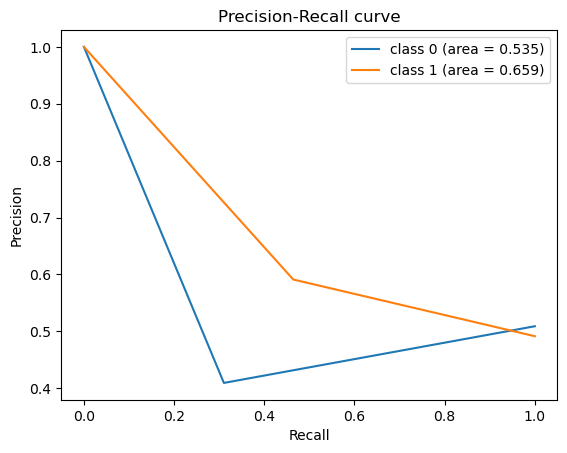

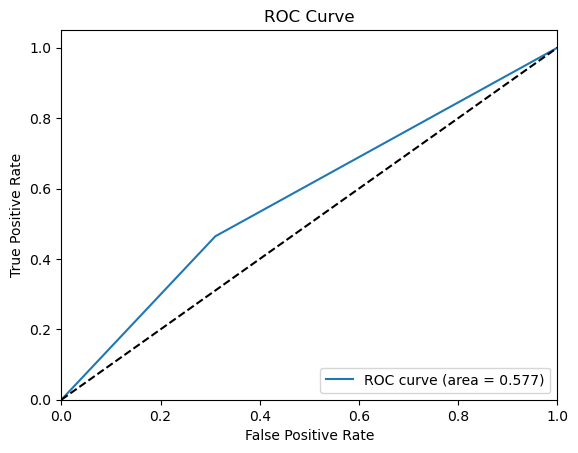

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# load your dataset and convert it to a pandas dataframe
data = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/tr_last3.csv')

# create a mask for the rows where column 2 has value 'a'
#mask = data['Country'] == 'T'

# split the dataframe into two parts: one for test and one for train
#test_df = data[mask]
#train_df = data[~mask]


# separate the labels and variables
y = data[data.columns[-1]]
X = data.drop(columns=(data.columns[[0,1,5,7,8,9]]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
#X_train=train_df.drop(columns=(train_df.columns[[0,1,5,9]]))
#X_test=test_df.drop(columns=(test_df.columns[[0,1,5,9]]))
#y_train=train_df[train_df.columns[-1]]
#y_test=test_df[test_df.columns[-1]]
#X_train.to_csv('/Users/mertcakir/Desktop/tez python/texts/X_train.csv', index=False)
#X_test.to_csv('/Users/mertcakir/Desktop/tez python/texts/X_test.csv', index=False)
#y_train.to_csv('/Users/mertcakir/Desktop/tez python/texts/y_train.csv', index=False)
#y_test.to_csv('/Users/mertcakir/Desktop/tez python/texts/y_test.csv', index=False)


# Create LightGBM dataset
train_dataset = lgb.Dataset(X_train, label=y_train)

# Train model
params = {'learning_rate': 0.001,
    'n_estimators': 300,
    'max_depth': 10,
    'num_leaves': 10,
    'subsample': 1,
    'colsample_bytree': 1,
    'min_child_weight': 1,
    'clf_random_state': 1 } 
model = lgb.train(params, train_dataset)

# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# calculate precision-recall curve for class 0
precisions0, recalls0, thresholds0 = precision_recall_curve(y_test, y_pred, pos_label=0)

# calculate precision-recall curve for class 1
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_pred, pos_label=1)

# calculate area under the curve for each class
area0 = auc(recalls0, precisions0)
area1 = auc(recalls1, precisions1)

# plot the precision-recall curves
plt.plot(recalls0, precisions0, label='class 0 (area = {:0.3f})'.format(area0))
plt.plot(recalls1, precisions1, label='class 1 (area = {:0.3f})'.format(area1))

# add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='bottom')
#plt.savefig("/Users/mertcakir/Desktop/ROC-PR/D2/trx3-pr.png")
plt.show()


# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
#plt.savefig("/Users/mertcakir/Desktop/ROC-PR/D2/trx3-roc.png")
plt.show()

Accuracy: 0.6857142857142857


/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


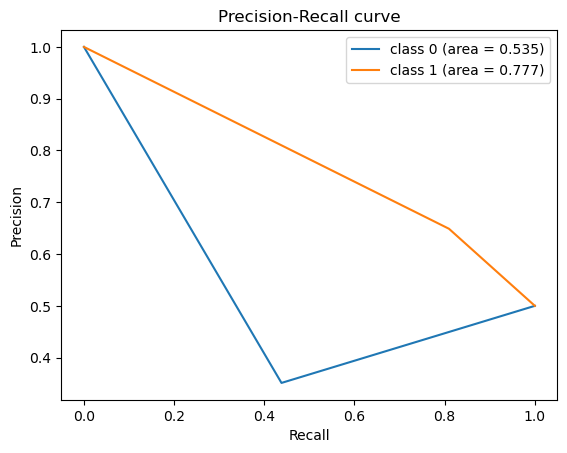

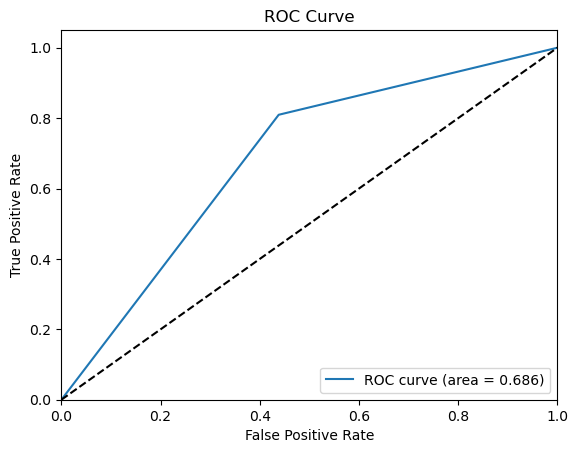

In [332]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# load your dataset and convert it to a pandas dataframe
data = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/merged_filev5.csv')

# separate the labels and variables
y = data[data.columns[-1]]
X = data.drop(columns=(data.columns[[0,1,5,9]]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the MLPClassifier with default parameters
clf = MLPClassifier(hidden_layer_sizes=(40,30), activation='relu', solver='adam', alpha=0.01, batch_size=32, max_iter=3000)

#'hidden_layer_sizes': [(10,), (20,), (30,), (40,)],
#    'activation': ['identity', 'logistic', 'tanh', 'relu'],
#    'solver': ['lbfgs', 'sgd', 'adam'],
#    'alpha': [0.0001, 0.001, 0.01, 0.1],
#    'batch_size': [32, 64, 128]

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get predictions on the test set
y_pred = clf.predict(X_test)

# Get accuracy score
acc = clf.score(X_test, y_test)
print("Accuracy:", acc)

# calculate precision-recall curve for class 0
precisions0, recalls0, thresholds0 = precision_recall_curve(y_test, y_pred, pos_label=0)

# calculate precision-recall curve for class 1
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_pred, pos_label=1)

# calculate area under the curve for each class
area0 = auc(recalls0, precisions0)
area1 = auc(recalls1, precisions1)

# plot the precision-recall curves
plt.plot(recalls0, precisions0, label='class 0 (area = {:0.3f})'.format(area0))
plt.plot(recalls1, precisions1, label='class 1 (area = {:0.3f})'.format(area1))

# add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='bottom')
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/MLP/h5-pr.png")
plt.show()


# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("/Users/mertcakir/Desktop/ROC-PR/MLP/h5-roc.png")
plt.show()